In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [222]:
np.random.seed(50)

# generate prices to be roughly $600 per square-foot
sqft = [220, 500, 550, 600, 750, 800, 900, 920, 1385, 1200, 1400, 1500, 1550, 1800, 2000]
prices = [np.round(i * np.random.normal(600, 200), 0)**(1/2) for i in sqft]
df = pd.DataFrame({'sqft': sqft, 'price': prices})
df

,sqft,price
0,220,251.684326
1,500,544.887144
2,550,511.564268
3,600,429.243521
4,750,813.505993
5,800,635.392005
6,900,632.072781
7,920,865.406841
8,1385,689.786199
9,1200,633.565308


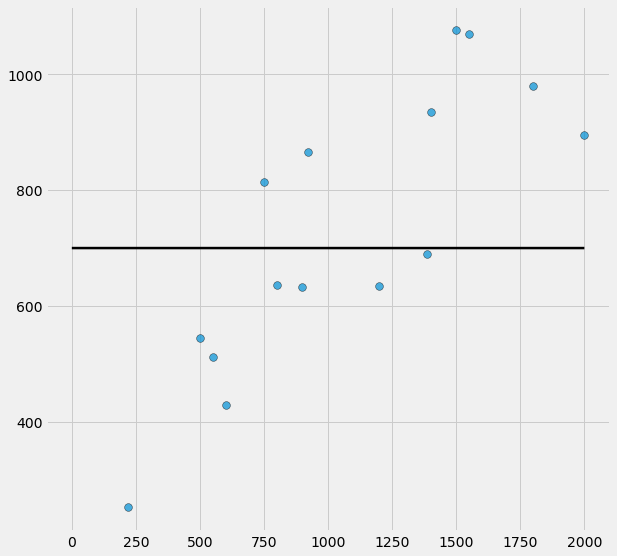

In [223]:
# Generate data
x = df.sqft
y = df.price

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
a_flat = 700
b_flat = 0

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, np.max(sqft), num=20000)

# Plot regression line
ax.plot(xseq, a_flat + b_flat * xseq, color="k", lw=2.5);

intercept:  321.59864857045363
slope:  0.38197273663560743


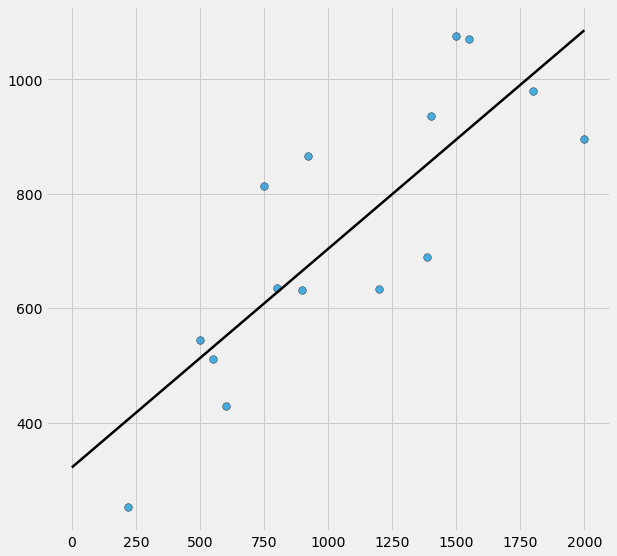

In [224]:
# Generate data
x = df.sqft
y = df.price

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
print('intercept: ', a)
print('slope: ', b)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, np.max(sqft), num=20000)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

intercept:  -44.81961275670247
slope:  24.463730112883983


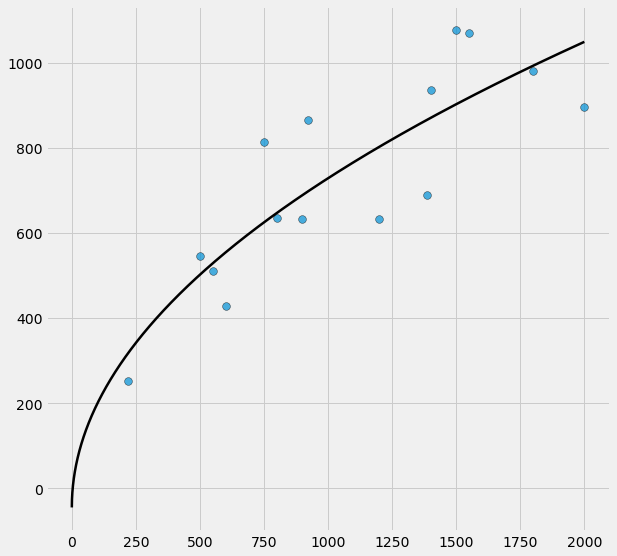

In [225]:
# Generate data
x = df.sqft
y = df.price

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b_sqrt, a_sqrt = np.polyfit(np.sqrt(x), y, deg=1)
print('intercept: ', a_sqrt)
print('slope: ', b_sqrt)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, np.max(sqft), num=20000)

# Plot regression line
ax.plot(xseq, a_sqrt + b_sqrt * np.sqrt(xseq), color="k", lw=2.5);

In [226]:
df['regressionLine'] = np.round(a + b * df['sqft'], 1)
df['regressionLineFlat'] = np.round(a_flat + b_flat * df['sqft'], 1)
df['regressionLineSqrt'] = np.round(a_sqrt + b_sqrt * np.sqrt(df['sqft']), 1)

In [227]:
df['sqft'] = df.sqft.astype(np.float)

In [228]:
df.to_json('scatterData2.json', orient='records')

In [229]:
df

,sqft,price,regressionLine,regressionLineFlat,regressionLineSqrt
0,220.0,251.684326,405.6,700,318.0
1,500.0,544.887144,512.6,700,502.2
2,550.0,511.564268,531.7,700,528.9
3,600.0,429.243521,550.8,700,554.4
4,750.0,813.505993,608.1,700,625.1
5,800.0,635.392005,627.2,700,647.1
6,900.0,632.072781,665.4,700,689.1
7,920.0,865.406841,673.0,700,697.2
8,1385.0,689.786199,850.6,700,865.6
9,1200.0,633.565308,780.0,700,802.6


# Gradients

In [247]:
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=100):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        b = 0
        m = 5
        n = X.shape[0]
        for _ in range(self.iterations):
            b_gradient = -2 * np.sum(y - m*X + b) / n
            m_gradient = -2 * np.sum(X*(y - (m*X + b))) / n
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
            print('b', b, 'm', m)
        self.m, self.b = m, b
        
    def predict(self, X):
        return self.m*X + self.b

In [248]:
np.random.seed(42)
X = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)


b 0.1546961511950457 m 4.508354184326409
b 0.2871431037967377 m 4.070711318769177
b 0.3998898795986114 m 3.681344484570461
b 0.495211390413702 m 3.3351267082287026
b 0.5751372950621506 m 3.0274683876898134
b 0.6414778412474276 m 2.7542612345127764
b 0.6958470064957634 m 2.5118280538799573
b 0.7396832196289146 m 2.2968777548816086
b 0.7742679149391068 m 2.1064650467221444
b 0.800742144982816 m 1.9379543331365225
b 0.8201214543897208 m 1.7889873680528
b 0.8333091960104457 m 1.6574542810047261
b 0.8411084518469535 m 1.541467621535429
b 0.8442327042944598 m 1.4393391083319846
b 0.8433153880691064 m 1.3495588015319393
b 0.8389184396181759 m 1.2707764459417257
b 0.8315399486452569 m 1.2017847591573843
b 0.8216210054844396 m 1.1415044620972266
b 0.8095518282936041 m 1.0889708705282048
b 0.7956772452891309 m 1.0433218850473887
b 0.780301599407162 m 1.0037872338952014
b 0.7636931357551305 m 0.9696788381323063
b 0.7460879259267627 m 0.9403821822903818
b 0.7276933776180899 m 0.9153485857725326
b 

Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

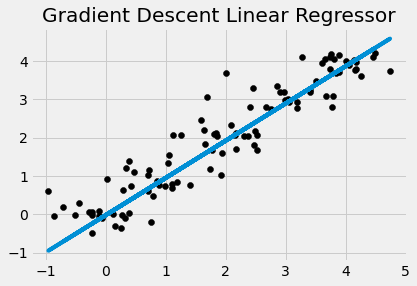

In [249]:
clf = GradientDescentLinearRegression()
clf.fit(X, y)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(X, y, color='black')
plt.plot(X, clf.predict(X))
plt.gca().set_title("Gradient Descent Linear Regressor")

In [159]:
gdWeight = 0
gdBias = 700
learning_rate = 0.001
N = df.shape[0]
iterations = 1

In [117]:
for _ in range(10):
    for i in range(iterations):
        biasDifference = df.price - gdWeight * df.sqft + gdBias
#         print('biasDifference', biasDifference)
        biasSum = np.sum(biasDifference)
#         print('biasSum', biasSum)
        b_gradient = (-2/N) * biasSum
#         print('b_gradient', np.round(b_gradient, 3))
        bias = gdBias + (learning_rate * b_gradient)
        gdBias = np.round(bias, 3)
        print('bias', gdBias)

bias 697.179
bias 694.363
bias 691.553
bias 688.748
bias 685.949
bias 683.156
bias 680.368
bias 677.586
bias 674.809
bias 672.038
bias 669.273
bias 666.513
bias 663.759
bias 661.01
bias 658.267
bias 655.529
bias 652.797
bias 650.07
bias 647.348
bias 644.632
bias 641.921
bias 639.216
bias 636.516
bias 633.822
bias 631.133
bias 628.449
bias 625.771
bias 623.098
bias 620.43
bias 617.768
bias 615.111
bias 612.459
bias 609.813
bias 607.172
bias 604.536
bias 601.906
bias 599.281
bias 596.661
bias 594.046
bias 591.436
bias 588.832
bias 586.233
bias 583.639
bias 581.05
bias 578.466
bias 575.888
bias 573.315
bias 570.747
bias 568.184
bias 565.626
bias 563.073
bias 560.525
bias 557.983
bias 555.446
bias 552.914
bias 550.387
bias 547.865
bias 545.348
bias 542.836
bias 540.329
bias 537.827
bias 535.33
bias 532.838
bias 530.351
bias 527.869
bias 525.392
bias 522.92
bias 520.453
bias 517.991
bias 515.534
bias 513.082
bias 510.634
bias 508.191
bias 505.753
bias 503.32
bias 500.892
bias 498.469
bias 4

In [162]:
for _ in range(1):
    for i in range(iterations):
        biasDifference = df.price - gdWeight * df.sqft + gdBias
        biasSum = np.sum(biasDifference)
        b_gradient = (-2/N) * biasSum
        bias = gdBias + (learning_rate * b_gradient)
        gdBias = np.round(bias, 3)
        print('bias', gdBias)
        
        
        weightDifference = df.sqft * (df.price - (gdWeight * df.sqft + gdBias))
        print('weightDifference', weightDifference)
        weightSum = np.sum(weightDifference)
        print('weightSum', weightSum)
        w_gradient = (-2/N) * weightSum
        print('w_gradient', np.round(w_gradient, 3))
        weight = gdWeight - (learning_rate * w_gradient)
        gdWeight = np.round(weight, 3)
        print('weight', gdWeight)

bias -1764349.077
weightDifference 0     0.000000e+00
1     4.291907e+10
2     2.205665e+11
3     2.667883e+11
4     3.174041e+11
5     4.956128e+11
6     5.638031e+11
7     7.133650e+11
8     7.453860e+11
9     1.688058e+12
10    1.267498e+12
11    1.724794e+12
12    1.979804e+12
13    2.113900e+12
14    2.850282e+12
15    3.518476e+12
dtype: float64
weightSum 18508658319592.336
w_gradient -2313582289949.042
weight 2312703553.801


In [52]:
b_gradient = (-2/N) * biasSum
print(np.round(b_gradient, 3))

-2821.412


In [53]:
gdBias += learning_rate * b_gradient
print(gdBias)

697.178587625


# Sklearn Implementation

Coefficients: 
 [[0.88128896]]
Mean squared error: 0.26
Coefficient of determination: 0.87


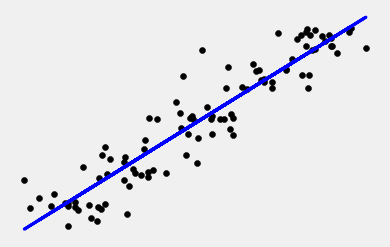

In [255]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X = X.reshape(-1, 1)
diabetes_y = y.reshape(-1,1)


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X, diabetes_y)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X, diabetes_y, color="black")
plt.plot(diabetes_X, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [252]:
m = 0
c = 0
learning_rate = 0.01
n = df.shape[0]
iterations = 1
np.random.seed(42)
X = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)
for i in range(100): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - learning_rate * D_m  # Update m
    print('m', m)
    c = c - learning_rate * D_c  # Update c
    print('c', c)

m 0.7923744839713918
c 0.2674101529016642
m 0.8702959708174572
c 0.29335144506622673
m 0.8780510770782747
c 0.2955942934525057
m 0.8789109408470567
c 0.29552375643620993
m 0.8790891947646421
c 0.2952392802742665
m 0.8791962403733622
c 0.2949464339591296
m 0.8792922155188427
c 0.29466482941126354
m 0.8793832116107952
c 0.29439584320995904
m 0.8794700040776645
c 0.2941390861861242
m 0.8795528382312529
c 0.29389401964733025
m 0.8796318996207977
c 0.2936601130086433
m 0.8797073605739876
c 0.293436858234567
m 0.879779385102267
c 0.2932237702666628
m 0.8798481297021382
c 0.2930203861200332
m 0.8799137437388838
c 0.292826263892141
m 0.8799763697753908
c 0.2926409818041162
m 0.880036143882326
c 0.29246413728447873
m 0.8800931959338243
c 0.2922953460944659
m 0.8801476498896766
c 0.2921342414931791
m 0.8801996240646641
c 0.29198047344074823
m 0.8802492313856265
c 0.29183370783778256
m 0.8802965796368233
c 0.29169362579945696
m 0.8803417716941225
c 0.29155992296265504
m 0.8803849057485243
c 0.291

In [219]:
df

,sqft,price
0,0,0.000000
1,220,361.437408
2,500,487.757112
3,550,410.969585
4,600,727.622155
5,750,615.215409
6,800,595.923653
7,900,855.948597
8,920,562.190359
9,1385,680.652628


In [220]:
print(c)

nan
